In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

C:\Users\nadia\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\nadia\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
from FlightRadar24 import FlightRadar24API

In [3]:
fr_api = FlightRadar24API()

In [4]:
airports = fr_api.get_airports()

In [6]:
len(airports)

5413

In [7]:
str_airports = []
for i in range(len(airports)):
    str_line = str(airports[i])
    c = str_line[str_line.find('<') + 1: str_line.find('>')]
    details_airport = c.split(" - ")
    str_airports.append(details_airport)

In [9]:
str_airports[0]

['(LECO) A Coruna Airport',
 'Altitude: 326',
 'Latitude: 43.302059',
 'Longitude: -8.37725']

In [10]:
str_airports[0][3].split(': ')[0]

'Longitude'

In [11]:
airport_name = []
altitude = []
latitude = []
longitude = []
for details_airport in str_airports:
    for i in details_airport:
        if i.split(': ')[0] == 'Altitude':
            altitude.append(int(i.split(': ')[1]))
        elif i.split(': ')[0] == 'Latitude':
            latitude.append(float(i.split(': ')[1]))
        elif i.split(': ')[0] == 'Longitude':
            longitude.append(float(i.split(': ')[1]))
        else:
            airport_name.append(i)         

In [12]:
data = {"airport_name":airport_name,
        'altitude': altitude,
        'latitude': latitude,
        'longitude': longitude
       }

In [13]:
df_airports = pd.DataFrame(data)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

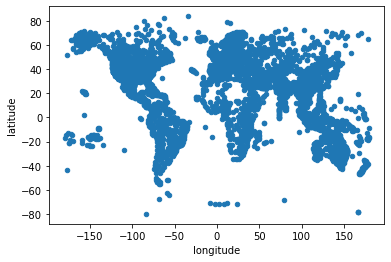

In [15]:
df_airports.plot(x = 'longitude', y = 'latitude', kind = 'scatter')

In [16]:
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

countries.head()

C:\Users\nadia\AppData\Local\Temp/ipykernel_13468/1789754122.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


pop_est      continent                      name iso_a3  gdp_md_est  \
0     889953.0        Oceania                      Fiji    FJI        5496   
1   58005463.0         Africa                  Tanzania    TZA       63177   
2     603253.0         Africa                 W. Sahara    ESH         907   
3   37589262.0  North America                    Canada    CAN     1736425   
4  328239523.0  North America  United States of America    USA    21433226   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

C:\Users\nadia\AppData\Local\Temp/ipykernel_13468/183210361.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


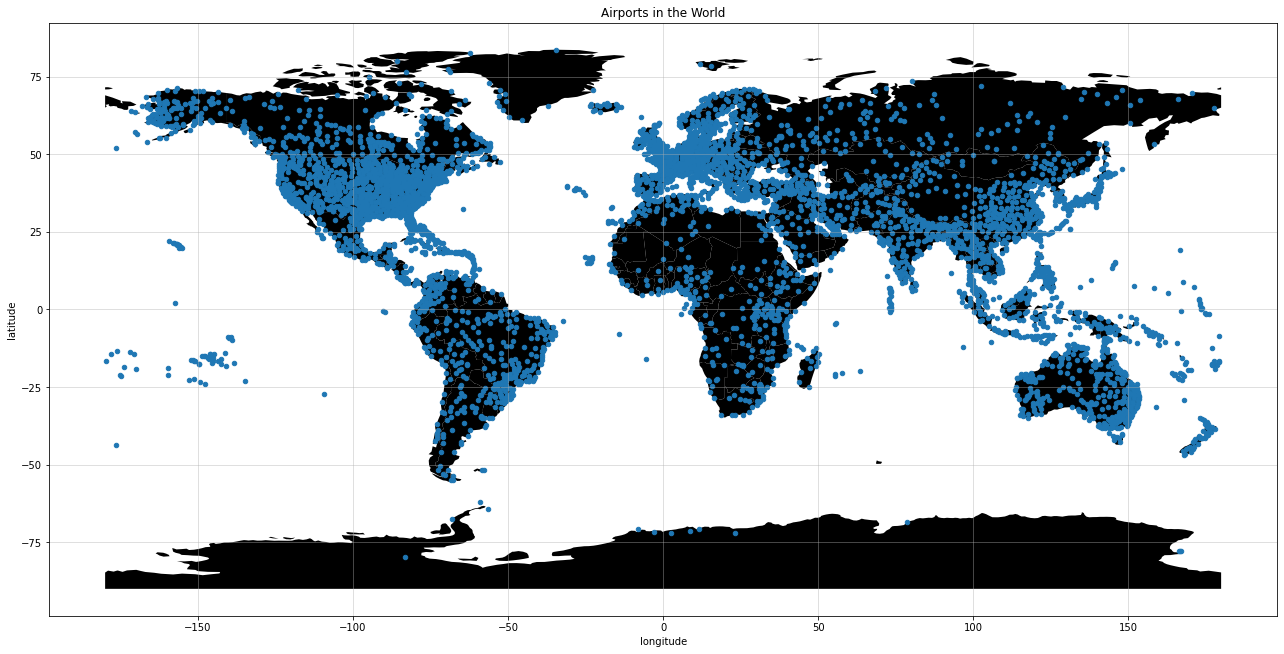

In [17]:
fig, ax = plt.subplots(figsize = (22, 20))
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries.plot(color="black", ax = ax)

# plot points
df_airports.plot(x = 'longitude', y = 'latitude', kind = 'scatter',
            title = 'Airports in the World', ax = ax)

# add grid
ax.grid(b = True, alpha = 0.5)
#plt.savefig("C://Users//nadia//Desktop//projects_gitlab//Airpots_in_the_world.pdf")
plt.show()

In [21]:
import airportsdata

In [128]:
airports2_ICAO = airportsdata.load('ICAO')

In [129]:
airports2_IATA = airportsdata.load('IATA')

In [130]:
airports2_LID = airportsdata.load('LID')

In [131]:
data1 = []
for i in airports2_ICAO.values():
    data1.append(i)
for i in airports2_IATA.values():
    data1.append(i)
for i in airports2_LID.values():
    data1.append(i)

In [132]:
df = pd.DataFrame(columns = data1[0].keys())

In [133]:
for i in range(len(data1)):
    df.loc[i] = data1[i].values()     

In [176]:
df.head()

icao iata                  name          city      subd country  elevation  \
0  00AA       Aero B Ranch Airport         Leoti    Kansas      US     3435.0   
1  00AK               Lowell Field  Anchor Point    Alaska      US      252.0   
2  00AL               Epps Airpark       Harvest   Alabama      US      820.0   
3  00AR             Arland Airport    Bennington    Kansas      US     1352.0   
4  00AS             Fulton Airport          Alex  Oklahoma      US     1100.0   

         lat         lon                 tz   lid  
0  38.704022 -101.473911    America/Chicago  00AA  
1  59.948889 -151.692222  America/Anchorage  00AK  
2  34.864810  -86.770278    America/Chicago  00AL  
3  38.969651  -97.601557    America/Chicago  00AR  
4  34.942803  -97.818019    America/Chicago  00AS

# Europe airports

In [161]:
countries_europe = countries[countries["continent"] == "Europe"]

In [135]:
europe_cities = ["AT", "BE", "BG", "CY", "CZ", "DE", "DK", "EE", "ES", "FI", "FR",
                "GR", "HR", "HU", "IE", "IT", "LT", "LU", "LV", "MT", "NL",
                "PL", "PT", "RO", "SE", "SI", "SK"]

In [158]:
df_europe = pd.DataFrame(columns = data1[0].keys())
for i in range(len(europe_cities)):
    data = df[df["country"] == europe_cities[i]]
    df_europe = pd.concat([df_europe, data], ignore_index = True)   

C:\Users\nadia\AppData\Local\Temp/ipykernel_13468/3280749768.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_europe = pd.concat([df_europe, data], ignore_index = True)


In [164]:
countries_europe = countries_europe[countries_europe["iso_a3"] != "RUS"]                                    

In [165]:
countries_europe = countries_europe[countries_europe["iso_a3"] != "-99"]  

In [167]:
df_europe = df_europe.rename(columns = {'lon': 'longitude', 'lat': 'latitude'})

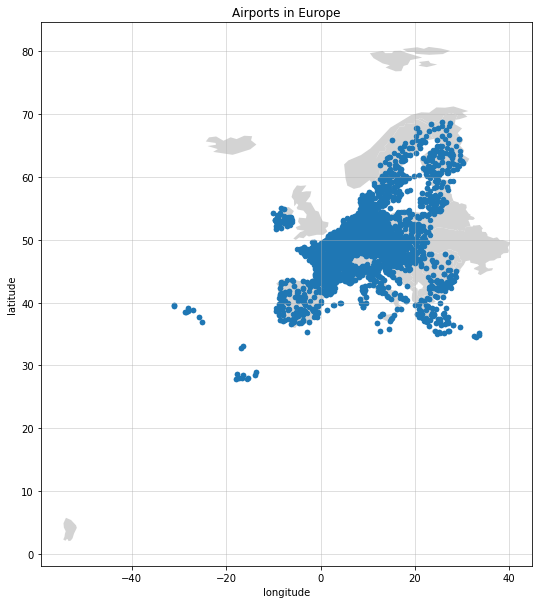

In [175]:
fig, ax = plt.subplots(figsize = (12, 10))
countries_europe.plot(color="lightgrey", ax = ax)

# plot points
df_europe.plot(x = 'longitude', y = 'latitude', kind = 'scatter',
            title = 'Airports in Europe', ax = ax)

# add grid
ax.grid(b = True, alpha = 0.5)
#plt.savefig("C://Users//nadia//Desktop//projects_gitlab//Airpots_in_europe.pdf")
plt.show()

# Poland airports

In [78]:
poland_airports = df[df["country"] == 'PL']

In [79]:
poland_airports = poland_airports.rename(columns = {'lon': 'longitude', 'lat': 'latitude'})

In [66]:
Poland = countries[countries["name"] == "Poland"]

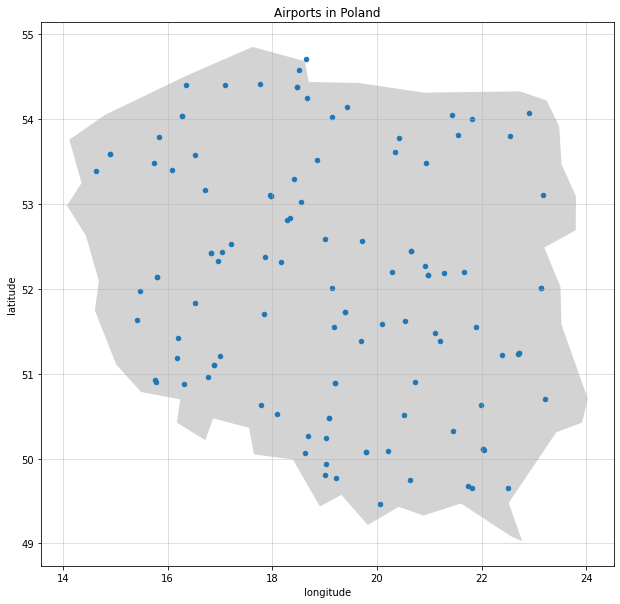

In [172]:
fig, ax = plt.subplots(figsize = (12, 10))
Poland.plot(color="lightgray", ax = ax)

# plot points
poland_airports.plot(x = 'longitude', y = 'latitude', kind = 'scatter',
            title = 'Airports in Poland', ax = ax)

# add grid
ax.grid(b = True, alpha = 0.5)
#plt.savefig("C://Users//nadia//Desktop//projects_gitlab//Airpots_in_poland.pdf")
plt.show()